# Inferential statistics II - Bootstrapping

In [125]:
import pandas as pd
import numpy as np
from numpy.random import seed
import matplotlib.pyplot as plt

## Medical charge data set

In [126]:
med_charges = pd.read_csv('data/insurance2.csv')

In [127]:
med_charges.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In the previous assignment, you used the frequentist approach to estimate the lower limit for the 95% confidence interval on the mean hospital charge. This approach relies on statistical theory that has been developed over the years and is also limited to statistics for which theoretical results on the sampling distribution exist. These results are remarkably useful and applicable much of the time and under a surprisingly wide range of conditions.

Having calculated the 95% lower confidence interval using frequentist theory in the previous exercise, you'll now use bootstrap inference to verify your calculations and check that you get consistent results without making the assumptions required before. After all, the distribution of charges really was very non-normal.

__Q:__ Use bootstrap sampling to estimate the same 95% confidence interval lower limit as before.

__A:__

In [128]:
np.random.seed(47)
N_rep = 10000
boot_sample = np.empty(N_rep)

for i in range(N_rep):
    boot_sample[i] = np.mean(np.random.choice(med_charges.charges, size=len(med_charges.charges)))

med_percentile = np.percentile(boot_sample, [2.5, 97.5])
print(med_percentile)


[12624.86211913 13918.00929997]


If you performed 10000 replicates immediately after setting the random seed to 47, you should get the value 12724 here, which compares very well with the value 12725 obtained using the _t_-distribution confidence interval previously. It is a most pleasant result to see the predictions of classical frequentist theory match with results that are now possible through the number-crunching ability of computers.

Remember, in the previous mini-projects, we saw that there are two ways of performing a _t_-test from a sample, depending on whether we can assume the groups have equal variance or not. We can actually easily test this using the bootstrap approach!

__Q:__ Calculate the 95% confidence interval for the difference between the standard deviations of insurance and non-insurance claim charges (insured - non-insured). Calculate the differences over 10000 replicates. Plot the histogram of values and mark the locations of the percentiles. State the null and alternative hypothesis and comment on whether you would retain or reject the null hypothesis in this case and why.

__A:__

In [129]:
#Generating bootstrap replicates

def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

# Generating many bootstrap replicates

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

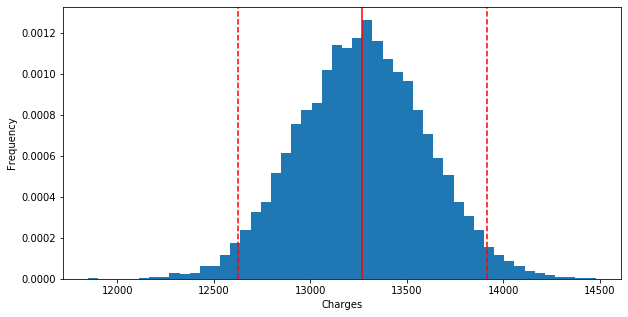

95% confidence interval = [12624.86211913 13918.00929997] charges
Mean of bs_replicates: 13268.292567069491
Lower bound: 12624.862119128531
Upper bound: 13918.009299969919


In [130]:
# Compute the 95% confidence interval: conf_int
conf_int = np.percentile(bs_replicates, [2.5, 97.5])

lower_bound = np.percentile(bs_replicates, 2.5)
upper_bound = np.percentile(bs_replicates, 97.5)


fig = plt.figure(figsize=(10,5))
ax = plt.hist(bs_replicates, bins=50, density=True)

plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.axvline(np.mean(bs_replicates), color='r')
plt.axvline(lower_bound, color='r', linestyle='--')
plt.axvline(upper_bound, color='r', linestyle='--')
plt.show()

print('95% confidence interval =', conf_int, 'charges')
print('Mean of bs_replicates: {}'.format(np.mean(bs_replicates)))
print('Lower bound: {}'.format(lower_bound))
print('Upper bound: {}'.format(upper_bound))

## Confidence interval and p-value

The confidence interval above is often a useful quantity to estimate. If we wish to limit our expected probability of making a Type I error (where we wrongly reject the null hypothesis, and it is, instead, true) to $\alpha$, the associated confidence interval is our estimate of the interval within which we expect the true population value to be found $100\times(1 - \alpha)$% of the time we do this test. In the above we performed bootstrap replicates to estimate the interval and reject the null hypothesis if this interval did not contain zero. You will sometimes see such an interval reported in the output of statistical functions.

The partner of the confidence interval is the p-value. The p-value and the confidence interval are linked through our choice of $\alpha$. The p-value tells us how likely it is, under the null hypothesis, to get an outcome at least as extreme as what was observed. If this fails to reach the level of our _pre-specified_ $\alpha$, we decide the null hypothesis is sufficiently unlikely to be true and thus reject it. To calculate this p-value via the bootstrap, we have to put ourselves in a position where we are simulating the null hypothesis being true and then calculate the fraction of times we observe a result at least as extreme as that actually observed.

Remember how, previously, you used the _t_-test to calculate the p-value for the observed difference between the means of insured and non-insured medical cases. We're now going to repeat this, this time using the bootstrap approach.

__Q:__ Perform a bootstrapped hypothesis test at the 5% significance level ($\alpha = 0.05$) to calculate the p-value of the observed difference between insurance and non-insurance charges, state your null and alternative hypotheses and whether you retain or reject the null hypothesis for the given significance level.

__A:__

# Bootstrap hypothesis test


## Let's create a histogram first, to see how being insured affects the charges 


In [131]:
insurance = med_charges.charges[med_charges.insuranceclaim == 1]
no_insurance = med_charges.charges[med_charges.insuranceclaim == 0]
n_ins = len(insurance)
n_no_ins = len(no_insurance)

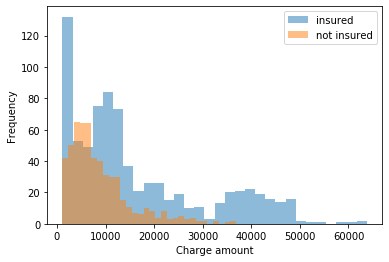

In [132]:
_ = plt.hist(insurance, bins=30, alpha=0.5, label='insured')
_ = plt.hist(no_insurance, bins=30, alpha=0.5, label='not insured')
_ = plt.xlabel('Charge amount')
_ = plt.ylabel('Frequency')
_ = plt.legend()

## Interestingly, according to this histogram, the True hypothesis is: 
### "being unsured lowers the charges related to insureds."


# Then, our null-hypothesis is
# "being unsured makes the charges higher related to charges of insureds."


## Let's check this hypothesis by creating a bootstrapped hypothesis test at the 5% significance level ( 𝛼=0.05 )

In [133]:
## First, Created 'control' and 'treated' data to examine:

#charges for insureds'
control = med_charges.charges[med_charges.insuranceclaim == 1]

#charges for insureds'
#aim to see how charges effected by being non-insurance
treated = med_charges.charges[med_charges.insuranceclaim == 0]

In [134]:
# Compute the difference in mean of charges between insured and non-insured: diff_means
diff_means = np.mean(control) - np.mean(treated)

# Compute mean of combined data set: combined_mean
combined_mean = np.mean(np.concatenate((control, treated)))

# Generate shifted data sets
control_shifted = control - np.mean(control) + combined_mean
treated_shifted = treated - np.mean(treated) + combined_mean

# Generate bootstrap replicates
bs_reps_control = draw_bs_reps(control_shifted,
                               np.mean, size=10000)
bs_reps_treated = draw_bs_reps(treated_shifted,
                               np.mean, size=10000)

# Get replicates of difference of means: bs_replicates
bs_reps = bs_reps_control - bs_reps_treated

# Compute and print p-value: p
p = np.sum(bs_reps >= diff_means) / len(bs_replicates)
print('p-value =', p)

# Check p value is lower than our significance level 0.05
print(p < 0.05) 

p-value = 0.0
True


# !!!We got the p-value as 0.0 which is lower than our significance level(0.05) Thus we reject the null hypothesis.

__Q:__ To put the above result in perspective, plot the histogram of your bootstrapped differences along with lines marking the locations of the observed difference. (Why would we plot more than one line, given that we only have one observed difference?)

__A:__

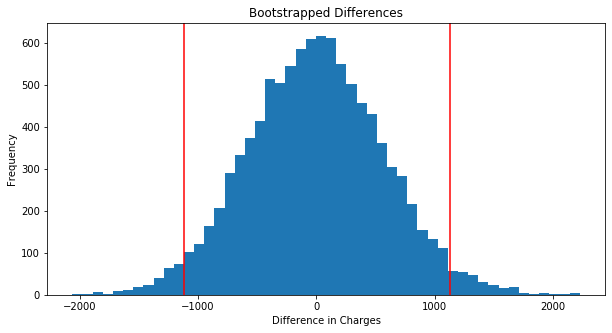

Lower bound: -1119.1776417738322
Upper bound: 1125.72252972747


In [135]:
lower_bound = np.percentile(bs_reps, 2.5)
upper_bound = np.percentile(bs_reps, 97.5)

fig = plt.figure(figsize=(10,5))
ax = plt.hist(bs_reps, bins=50)

_ = plt.xlabel('Difference in Charges')
_ = plt.ylabel('Frequency')
_ = plt.axvline(lower_bound, color='r')
_ = plt.axvline(upper_bound, color='r')
_ = plt.title('Bootstrapped Differences')
_ = plt.show()

print('Lower bound: {}'.format(lower_bound))
print('Upper bound: {}'.format(upper_bound))

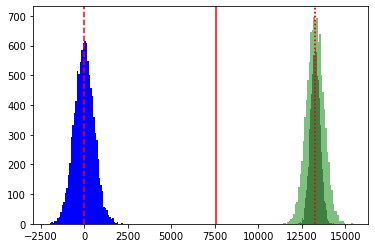

In [136]:
_ = plt.hist(bs_reps, bins = 50, color = 'blue')
_ = plt.hist(bs_reps_treated, alpha = 0.5, bins = 50, color = 'black')
_ = plt.hist(bs_reps_control, alpha = 0.5, bins = 50, color = 'green')

_ = plt.axvline(np.mean(diff_means),color='r')
_ = plt.axvline(np.mean(bs_reps),color='r', linestyle='--')
_ = plt.axvline(np.mean(bs_reps_control),color='red', linestyle=':')
_ = plt.axvline(np.mean(bs_reps_treated),color='red', linestyle=':')

###  We plot more than one line(50 bins), even if we only have one observed difference(bs_reps). Because we actually generated bootstrap replicates in the size of 10000.

__Q:__ Compare your p-value above with that obtained using the _t_-test function in the previous assignment. Do you think you would want to try to perform enough bootstrap replicates to observe a random difference as large as that we did observe?

__A:__

### Hereby, the p-value calculated by a bootstrap approach is 0.0
### The p-value of the previous assignment calculated by a frequentist (parametric) approach was 4.46.
### A lower p-value is better, so this approach (bootstrap) is preferred for this dataset.

__Q:__ Consider the two variants of the _t_-test we performed in the previous assignment. Which one would you use now?

__A:__


### In the previous assignment we used two variants of the t-test: a normal variance, and a non-normal variance.
### For this dataset here, we should assume that there is a normal variance.

__Q:__ If, instead of being asked whether the means of two groups were different, you were working with an ad-recommender team who wanted to release a new recommendation algorithm, and you were looking at click-through rate both for the current algorithm (call it A) and from trials of their new algorithm (call it B), would you perform a two-sided test as above? What would be your null and alternative hypotheses and what would be the real-world consequence of rejecting the null hypothesis?

__A:__

### If instead we were analyzing an A/B test for an ad-recommeder system. 
### We would perform a permutation test to determine if the redesign would improve the click-through rate.
### The null-hypothesis is 'The results by the algorithm are impervious to the change.'
### A low p-value implies that change in strategy led to improved performance.